In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets

In [3]:
latitude = 28.61    # Delhi
longitude = 77.20
url = (
    "https://api.open-meteo.com/v1/forecast"
    f"?latitude={latitude}&longitude={longitude}"
    "&current_weather=true"
)

response = requests.get(url)
data = response.json()

data


{'latitude': 28.625,
 'longitude': 77.25,
 'generationtime_ms': 0.056624412536621094,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 221.0,
 'current_weather_units': {'time': 'iso8601',
  'interval': 'seconds',
  'temperature': '°C',
  'windspeed': 'km/h',
  'winddirection': '°',
  'is_day': '',
  'weathercode': 'wmo code'},
 'current_weather': {'time': '2026-01-15T17:15',
  'interval': 900,
  'temperature': 10.1,
  'windspeed': 4.0,
  'winddirection': 280,
  'is_day': 0,
  'weathercode': 0}}

In [4]:
current = data["current_weather"]

weather_data = {
    "date": datetime.now().strftime("%Y-%m-%d"),
    "temperature": current["temperature"],
    "windspeed": current["windspeed"],
    "weathercode": current["weathercode"]
}

weather_data


{'date': '2026-01-15', 'temperature': 10.1, 'windspeed': 4.0, 'weathercode': 0}

In [5]:
df = pd.DataFrame([weather_data])
file_name = "weather_history.csv"

try:
    old_data = pd.read_csv(file_name)
    df = pd.concat([old_data, df], ignore_index=True)
except:
    pass

df.to_csv(file_name, index=False)
df

,date,temperature,windspeed,weathercode
0,2026-01-15,10.1,4.0,0


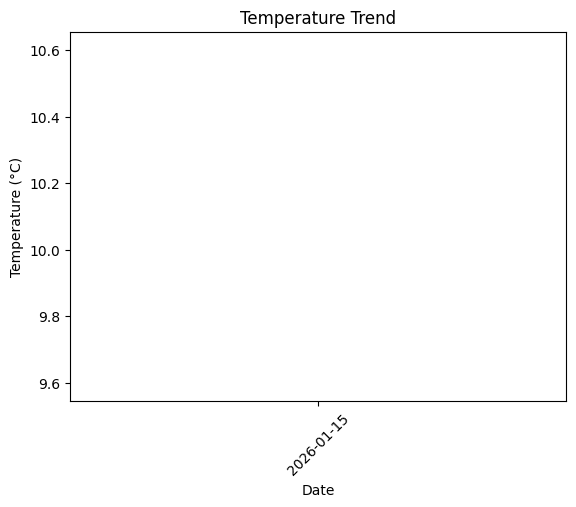

In [6]:
plt.figure()
plt.plot(df["date"], df["temperature"])
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend")
plt.xticks(rotation=45)
plt.show()

In [7]:

if len(df) >= 3:
    last_3 = df.tail(3)
    if all(last_3["temperature"] > 38):
        print("HEATWAVE ALERT! Temperature > 38°C for 3 consecutive days")
    else:
        print("Weather normal")
else:
    print("Not enough data yet to check heatwave")


Not enough data yet to check heatwave


In [8]:
rain_codes = list(range(61, 68)) + list(range(80, 83))

if current["weathercode"] in rain_codes:
    print(" Rain alert! Take an umbrella!")
else:
    print("No rain today")


No rain today


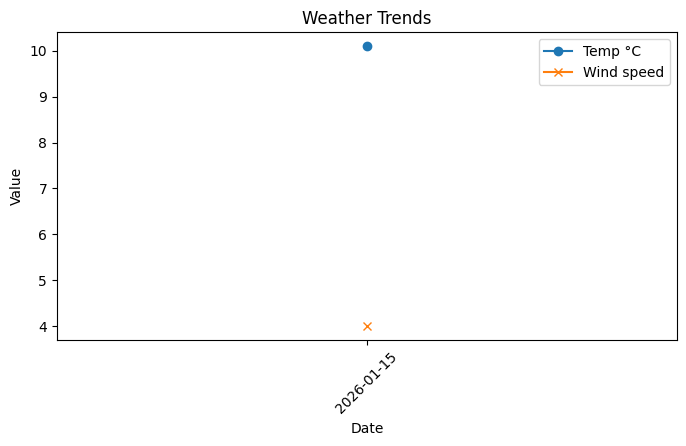

In [9]:
plt.figure(figsize=(8,4))
plt.plot(df["date"], df["temperature"], marker='o', label='Temp °C')
plt.plot(df["date"], df["windspeed"], marker='x', label='Wind speed')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Weather Trends")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [10]:
df['day_index'] = np.arange(len(df))
X = df[['day_index']]
y = df['temperature']
model = LinearRegression()
model.fit(X, y)
next_day = np.array([[len(df)]])
pred_temp = model.predict(next_day)[0]
print(f"Predicted temperature for next day: {pred_temp:.2f}°C")

Predicted temperature for next day: 10.10°C


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
city_coords = {
    'Delhi': {'latitude': 28.61, 'longitude': 77.20},
    'Mumbai': {'latitude': 19.0760, 'longitude': 72.8777},
    'Bangalore': {'latitude': 12.9716, 'longitude': 77.5946},
    'Kolkata': {'latitude': 22.5726, 'longitude': 88.3639},
    'Chennai': {'latitude': 13.0827, 'longitude': 80.2707},
}

def display_weather(city_name):
    coords = city_coords.get(city_name)
    if not coords:
        print(f"Coordinates not found for {city_name}")
        return

    latitude = coords['latitude']
    longitude = coords['longitude']

    url = (
        "https://api.open-meteo.com/v1/forecast"
        f"?latitude={latitude}&longitude={longitude}"
        "&current_weather=true"
    )

    response = requests.get(url)
    data = response.json()

    current = data.get("current_weather")
    if current:
        print(f"Weather for {city_name} ({latitude}°N, {longitude}°E):")
        print(f"  Temperature: {current['temperature']}°C")
        print(f"  Wind Speed: {current['windspeed']} km/h")
        print(f"  Weather Code: {current['weathercode']}")
        print(f"  Time: {current['time']}")
    else:
        print(f"Could not retrieve current weather for {city_name}.")

city_dropdown = widgets.Dropdown(
    options=list(city_coords.keys()),
    value='Delhi',
    description='City:',
    disabled=False,
)

widgets.interact(display_weather, city_name=city_dropdown)

interactive(children=(Dropdown(description='City:', options=('Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Chenn…

<function __main__.display_weather(city_name)>

In [12]:
city_coords = {
    'Delhi': {'latitude': 28.61, 'longitude': 77.20},
    'Mumbai': {'latitude': 19.0760, 'longitude': 72.8777},
    'Bangalore': {'latitude': 12.9716, 'longitude': 77.5946},
    'Kolkata': {'latitude': 22.5726, 'longitude': 88.3639},
    'Chennai': {'latitude': 13.0827, 'longitude': 80.2707},
}

def display_weather(city_name):
    coords = city_coords.get(city_name)
    if not coords:
        print(f"Coordinates not found for {city_name}")
        return

    latitude = coords['latitude']
    longitude = coords['longitude']

    url = (
        "https://api.open-meteo.com/v1/forecast"
        f"?latitude={latitude}&longitude={longitude}"
        "&current_weather=true"
    )

    response = requests.get(url)
    data = response.json()

    current = data.get("current_weather")
    if current:
        print(f"Weather for {city_name} ({latitude}°N, {longitude}°E):")
        print(f"  Temperature: {current['temperature']}°C")
        print(f"  Wind Speed: {current['windspeed']} km/h")
        print(f"  Weather Code: {current['weathercode']}")
        print(f"  Time: {current['time']}")
    else:
        print(f"Could not retrieve current weather for {city_name}.")

city_dropdown = widgets.Dropdown(
    options=list(city_coords.keys()),
    value='Delhi',
    description='City:',
    disabled=False,
)


In [13]:
widgets.interact(display_weather, city_name=city_dropdown)

interactive(children=(Dropdown(description='City:', options=('Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Chenn…

<function __main__.display_weather(city_name)>